# BPIC 2012

In [2]:
!pip3 install pm4py==2.2.24

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import numpy as np
import pandas as pd

In [14]:
from pm4py.objects.log.importer.xes import importer as xes_importer
financial_log = xes_importer.apply('/content/financial_log.xes')


parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

In [15]:
financial_log

[{'attributes': {'REG_DATE': datetime.datetime(2011, 10, 1, 0, 38, 44, 546000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))), 'concept:name': '173688', 'AMOUNT_REQ': '20000'}, 'events': [{'org:resource': '112', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'A_SUBMITTED', 'time:timestamp': datetime.datetime(2011, 10, 1, 0, 38, 44, 546000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}, '..', {'org:resource': '10629', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'W_Valideren aanvraag', 'time:timestamp': datetime.datetime(2011, 10, 13, 10, 37, 37, 26000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}]}, '....', {'attributes': {'REG_DATE': datetime.datetime(2012, 2, 29, 23, 51, 16, 799000, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'concept:name': '214376', 'AMOUNT_REQ': '15000'}, 'events': [{'org:resource': '112', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'A_SUBMITTED', 'time:timestamp': datetime.datetime(2

In [19]:
len(financial_log)

13087

In [16]:
import pm4py
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

In [17]:

financial_log_df = pm4py.convert_to_dataframe(financial_log)

In [18]:
financial_log_df

,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ
0,112,COMPLETE,A_SUBMITTED,2011-10-01 00:38:44.546000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000
1,112,COMPLETE,A_PARTLYSUBMITTED,2011-10-01 00:38:44.880000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000
2,112,COMPLETE,A_PREACCEPTED,2011-10-01 00:39:37.906000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000
3,112,SCHEDULE,W_Completeren aanvraag,2011-10-01 00:39:38.875000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000
4,NaN,START,W_Completeren aanvraag,2011-10-01 11:36:46.437000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000
...,...,...,...,...,...,...,...
262195,112,COMPLETE,A_PARTLYSUBMITTED,2012-02-29 23:51:17.423000+01:00,2012-02-29 23:51:16.799000+01:00,214376,15000
262196,112,SCHEDULE,W_Afhandelen leads,2012-02-29 23:52:01.287000+01:00,2012-02-29 23:51:16.799000+01:00,214376,15000
262197,11169,START,W_Afhandelen leads,2012-03-01 09:26:46.736000+01:00,2012-02-29 23:51:16.799000+01:00,214376,15000
262198,11169,COMPLETE,A_DECLINED,2012-03-01 09:27:37.118000+01:00,2012-02-29 23:51:16.799000+01:00,214376,15000


In [22]:
list_activities = pm4py.get_event_attribute_values(financial_log,"concept:name")
print(len(list_activities))
list_activities

24


{'A_SUBMITTED': 13087,
 'A_PARTLYSUBMITTED': 13087,
 'A_PREACCEPTED': 7367,
 'W_Completeren aanvraag': 54850,
 'A_ACCEPTED': 5113,
 'O_SELECTED': 7030,
 'A_FINALIZED': 5015,
 'O_CREATED': 7030,
 'O_SENT': 7030,
 'W_Nabellen offertes': 52016,
 'O_SENT_BACK': 3454,
 'W_Valideren aanvraag': 20809,
 'A_REGISTERED': 2246,
 'A_APPROVED': 2246,
 'O_ACCEPTED': 2243,
 'A_ACTIVATED': 2246,
 'O_CANCELLED': 3655,
 'W_Wijzigen contractgegevens': 12,
 'A_DECLINED': 7635,
 'A_CANCELLED': 2807,
 'W_Afhandelen leads': 16566,
 'O_DECLINED': 802,
 'W_Nabellen incomplete dossiers': 25190,
 'W_Beoordelen fraude': 664}

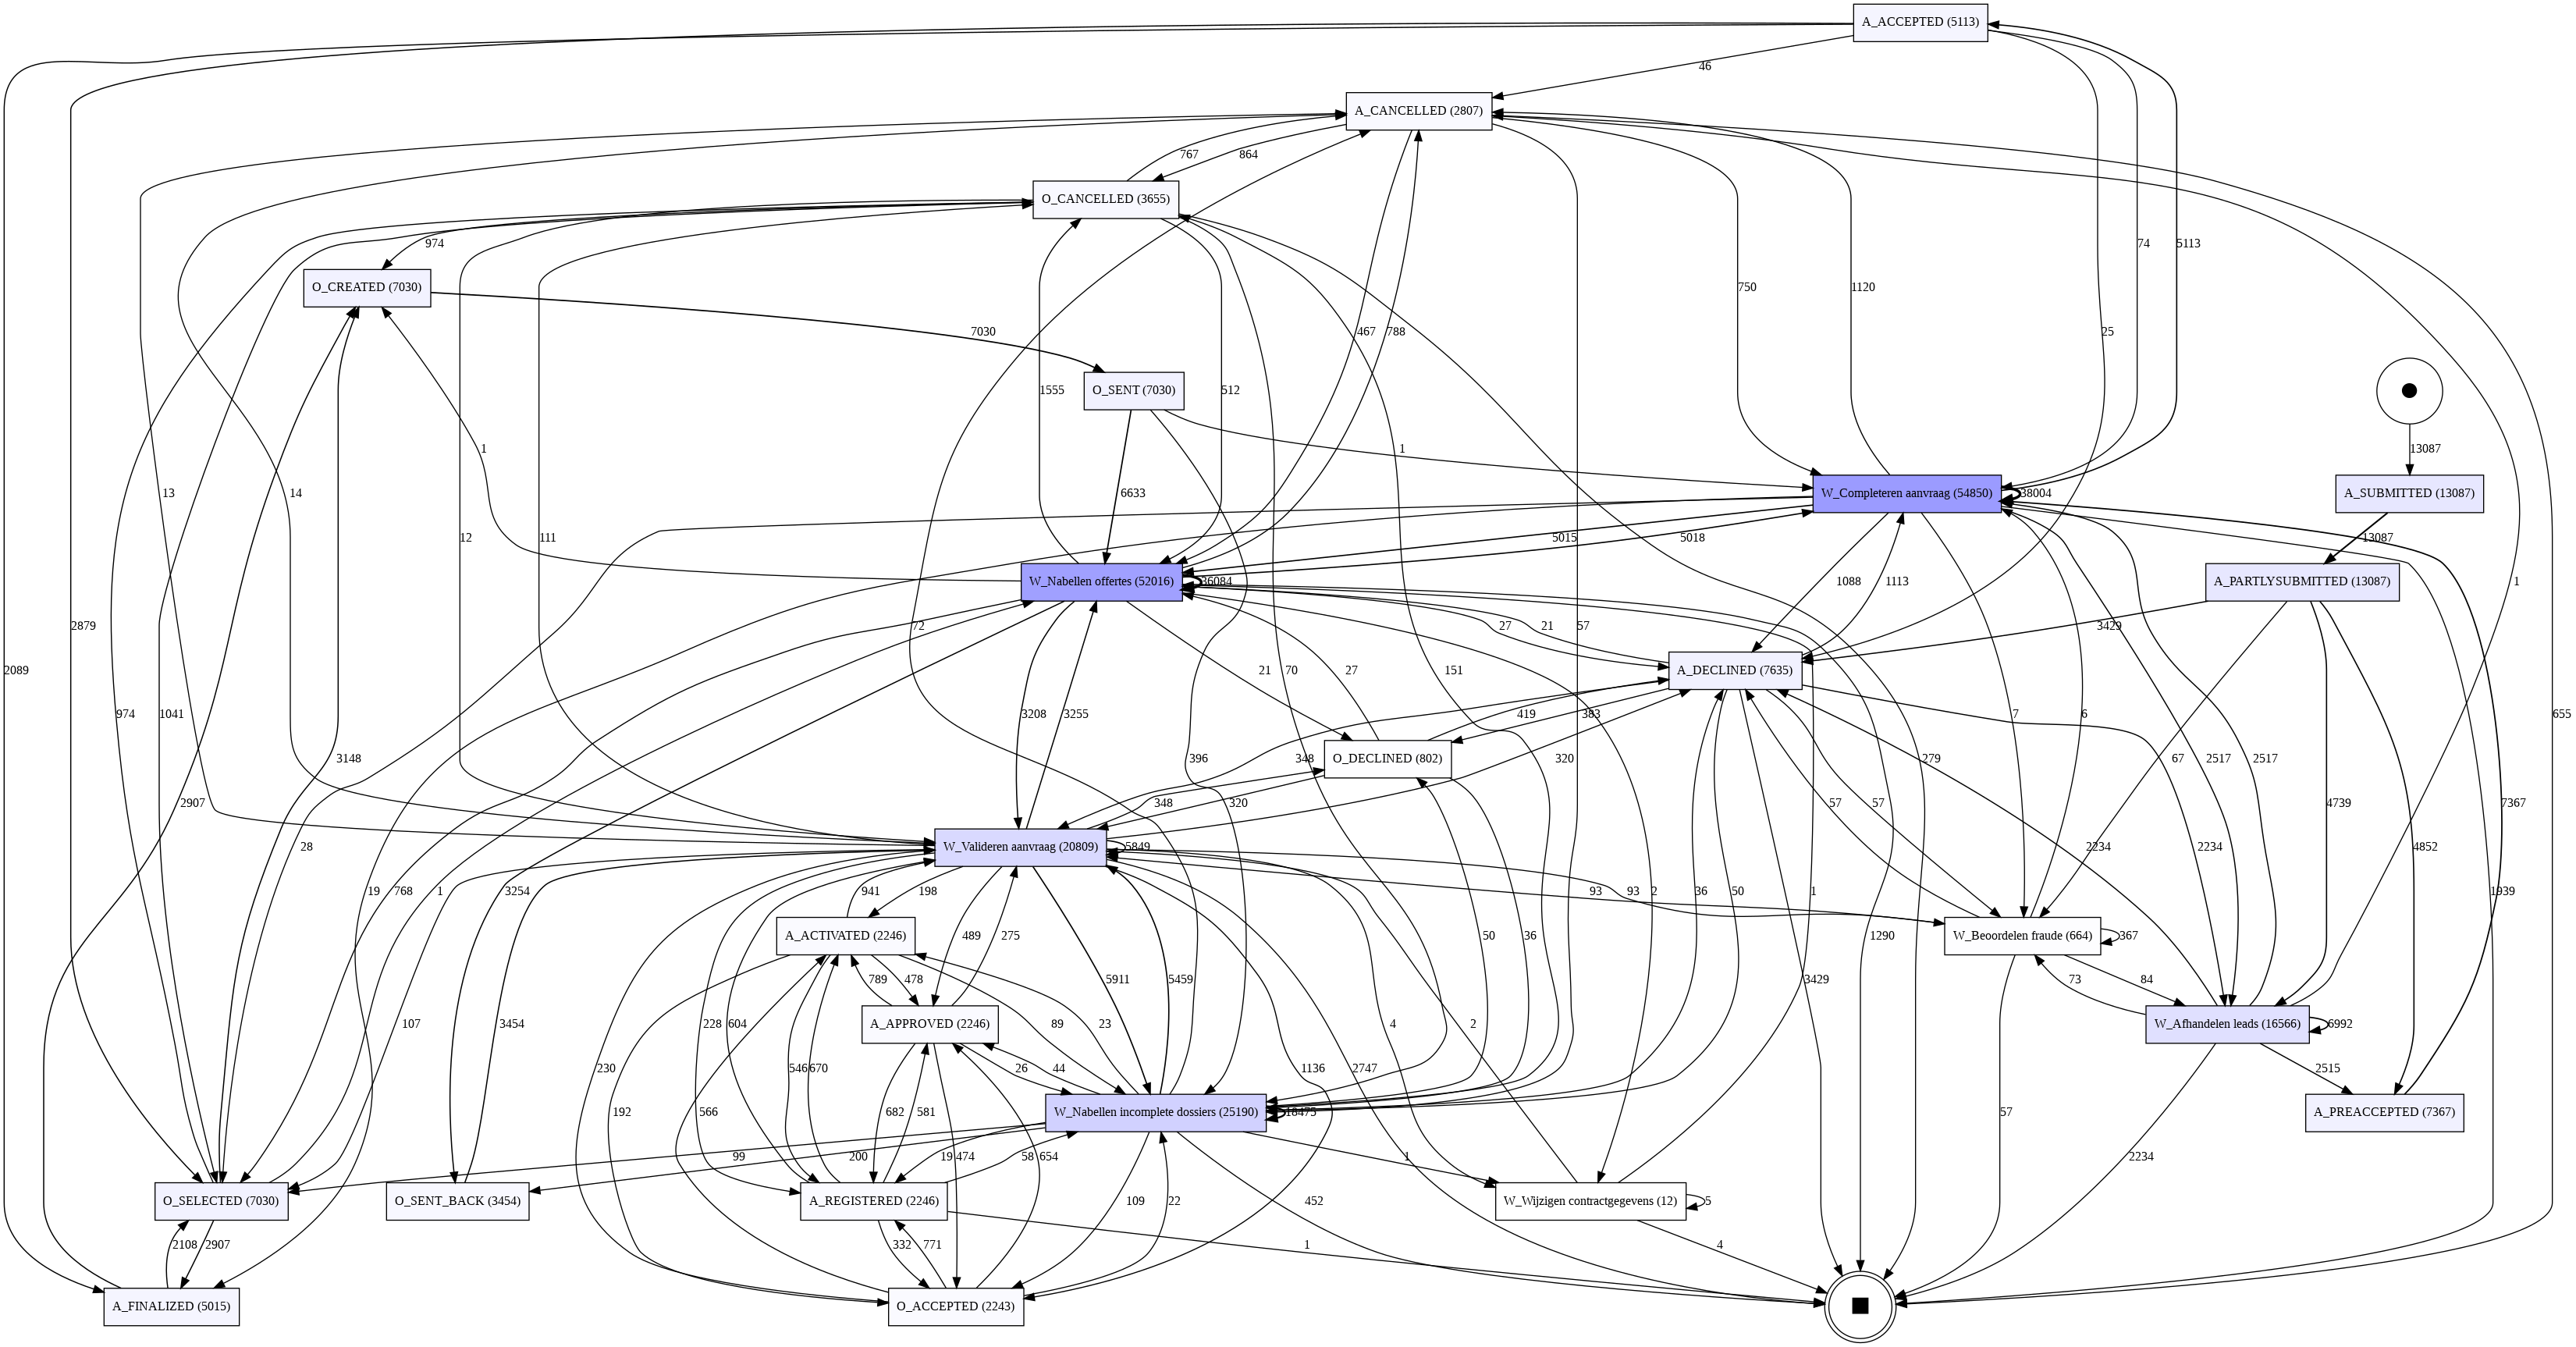

In [23]:

dfg, start_activities, end_activities = pm4py.discover_dfg(financial_log)
pm4py.view_dfg(dfg, start_activities, end_activities)

In [49]:
financial_log_df = dataframe_utils.convert_timestamp_columns_in_df(financial_log_df)


In [50]:
financial_log_df = financial_log_df.sort_values('time:timestamp')

In [51]:
financial_log_df

,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ
0,112,COMPLETE,A_SUBMITTED,2011-09-30 22:38:44.546000+00:00,2011-09-30 22:38:44.546000+00:00,173688,20000
1,112,COMPLETE,A_PARTLYSUBMITTED,2011-09-30 22:38:44.880000+00:00,2011-09-30 22:38:44.546000+00:00,173688,20000
2,112,COMPLETE,A_PREACCEPTED,2011-09-30 22:39:37.906000+00:00,2011-09-30 22:38:44.546000+00:00,173688,20000
3,112,SCHEDULE,W_Completeren aanvraag,2011-09-30 22:39:38.875000+00:00,2011-09-30 22:38:44.546000+00:00,173688,20000
26,112,COMPLETE,A_SUBMITTED,2011-10-01 06:08:58.256000+00:00,2011-10-01 06:08:58.256000+00:00,173691,5000
...,...,...,...,...,...,...,...
256158,10863,START,W_Nabellen incomplete dossiers,2012-03-14 14:59:28.309000+00:00,2012-02-27 13:12:41.868000+00:00,213276,15000
256159,10863,COMPLETE,W_Nabellen incomplete dossiers,2012-03-14 15:00:09.680000+00:00,2012-02-27 13:12:41.868000+00:00,213276,15000
235011,11169,START,W_Nabellen offertes,2012-03-14 15:02:03.883000+00:00,2012-02-15 09:10:36.503000+00:00,209595,13000
246922,11203,START,W_Nabellen incomplete dossiers,2012-03-14 15:04:46.192000+00:00,2012-02-21 22:38:40.044000+00:00,211624,35000


In [32]:
import matplotlib.pyplot as plt
import math

In [210]:
application_log_df = financial_log_df[financial_log_df['concept:name'].isin(['A_ACCEPTED','A_ACTIVATED','A_APPROVED','A_CANCELLED','A_DECLINED','A_FINALIZED','A_PARTLYSUBMITTED','A_PREACCEPTED','A_REGISTERED','A_SUBMITTED'])] 
offers_log_df = financial_log_df[financial_log_df['concept:name'].isin(['O_ACCEPTED' , 'O_CANCELLED', 'O_CREATED','O_DECLINED' , 'O_SELECTED', 'O_SENT', 'O_SENT_BACK'])]
workItems_log_df = financial_log_df[financial_log_df['concept:name'].isin(['W_Afhandelen leads' , 'W_Beoordelen fraude','W_Completeren aanvraag','W_Nabellen incomplete dossiers','W_Nabellen offertes','W_Valideren aanvraag','W_Wijzigen contractgegevens'])]

In [39]:
application_log_df

,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ
0,112,COMPLETE,A_SUBMITTED,2011-09-30 22:38:44.546000+00:00,2011-09-30 22:38:44.546000+00:00,173688,20000
1,112,COMPLETE,A_PARTLYSUBMITTED,2011-09-30 22:38:44.880000+00:00,2011-09-30 22:38:44.546000+00:00,173688,20000
2,112,COMPLETE,A_PREACCEPTED,2011-09-30 22:39:37.906000+00:00,2011-09-30 22:38:44.546000+00:00,173688,20000
26,112,COMPLETE,A_SUBMITTED,2011-10-01 06:08:58.256000+00:00,2011-10-01 06:08:58.256000+00:00,173691,5000
27,112,COMPLETE,A_PARTLYSUBMITTED,2011-10-01 06:09:02.195000+00:00,2011-10-01 06:08:58.256000+00:00,173691,5000
...,...,...,...,...,...,...,...
231114,11339,COMPLETE,A_APPROVED,2012-03-14 14:31:28.859000+00:00,2012-02-13 14:50:41.425000+00:00,208901,11000
231117,11339,COMPLETE,A_REGISTERED,2012-03-14 14:31:28.859000+00:00,2012-02-13 14:50:41.425000+00:00,208901,11000
216869,10809,COMPLETE,A_APPROVED,2012-03-14 14:33:57.651000+00:00,2012-02-05 15:42:18.178000+00:00,206615,22000
216870,10809,COMPLETE,A_REGISTERED,2012-03-14 14:33:57.651000+00:00,2012-02-05 15:42:18.178000+00:00,206615,22000


In [40]:
offers_log_df

,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ
210,10862,COMPLETE,O_SELECTED,2011-10-01 08:44:40.725000+00:00,2011-10-01 08:37:39.362000+00:00,173718,15000
211,10862,COMPLETE,O_CREATED,2011-10-01 08:44:42.707000+00:00,2011-10-01 08:37:39.362000+00:00,173718,15000
212,10862,COMPLETE,O_SENT,2011-10-01 08:44:42.734000+00:00,2011-10-01 08:37:39.362000+00:00,173718,15000
218,10862,COMPLETE,O_SELECTED,2011-10-01 08:46:52.915000+00:00,2011-10-01 08:37:39.362000+00:00,173718,15000
219,10862,COMPLETE,O_CANCELLED,2011-10-01 08:46:52.915000+00:00,2011-10-01 08:37:39.362000+00:00,173718,15000
...,...,...,...,...,...,...,...
229717,11169,COMPLETE,O_SENT,2012-03-14 14:46:23.386000+00:00,2012-02-12 20:44:14.534000+00:00,208652,20000
260268,11169,COMPLETE,O_SELECTED,2012-03-14 14:50:58.333000+00:00,2012-02-29 08:35:19.601000+00:00,213998,12500
260269,11169,COMPLETE,O_CANCELLED,2012-03-14 14:50:58.333000+00:00,2012-02-29 08:35:19.601000+00:00,213998,12500
260270,11169,COMPLETE,O_CREATED,2012-03-14 14:50:59.651000+00:00,2012-02-29 08:35:19.601000+00:00,213998,12500


In [41]:
workItems_log_df

,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ
3,112,SCHEDULE,W_Completeren aanvraag,2011-09-30 22:39:38.875000+00:00,2011-09-30 22:38:44.546000+00:00,173688,20000
29,112,SCHEDULE,W_Completeren aanvraag,2011-10-01 06:09:59.578000+00:00,2011-10-01 06:08:58.256000+00:00,173691,5000
68,112,SCHEDULE,W_Completeren aanvraag,2011-10-01 06:11:13.390000+00:00,2011-10-01 06:10:30.287000+00:00,173694,7000
141,112,SCHEDULE,W_Afhandelen leads,2011-10-01 07:46:18.623000+00:00,2011-10-01 07:45:37.274000+00:00,173706,18000
133,112,SCHEDULE,W_Completeren aanvraag,2011-10-01 07:46:18.674000+00:00,2011-10-01 07:45:25.806000+00:00,173703,13500
...,...,...,...,...,...,...,...
256158,10863,START,W_Nabellen incomplete dossiers,2012-03-14 14:59:28.309000+00:00,2012-02-27 13:12:41.868000+00:00,213276,15000
256159,10863,COMPLETE,W_Nabellen incomplete dossiers,2012-03-14 15:00:09.680000+00:00,2012-02-27 13:12:41.868000+00:00,213276,15000
235011,11169,START,W_Nabellen offertes,2012-03-14 15:02:03.883000+00:00,2012-02-15 09:10:36.503000+00:00,209595,13000
246922,11203,START,W_Nabellen incomplete dossiers,2012-03-14 15:04:46.192000+00:00,2012-02-21 22:38:40.044000+00:00,211624,35000


In [211]:
workItems_log = log_converter.apply(workItems_log_df)

In [44]:
offers_log = log_converter.apply(offers_log_df)

In [45]:
application_log = log_converter.apply(application_log_df)

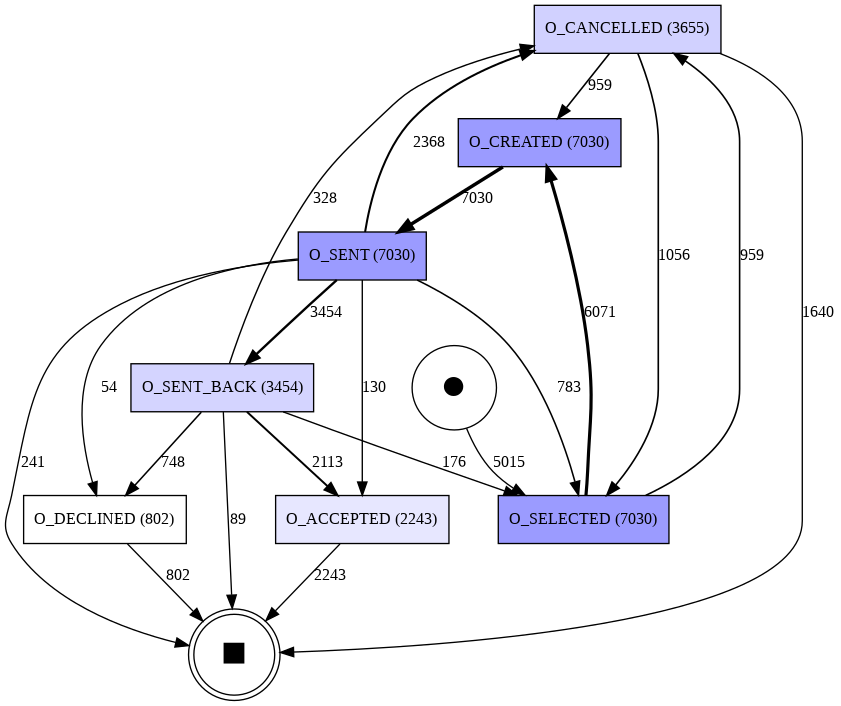

In [47]:

dfg, start_activities, end_activities = pm4py.discover_dfg(offers_log)
pm4py.view_dfg(dfg, start_activities, end_activities)

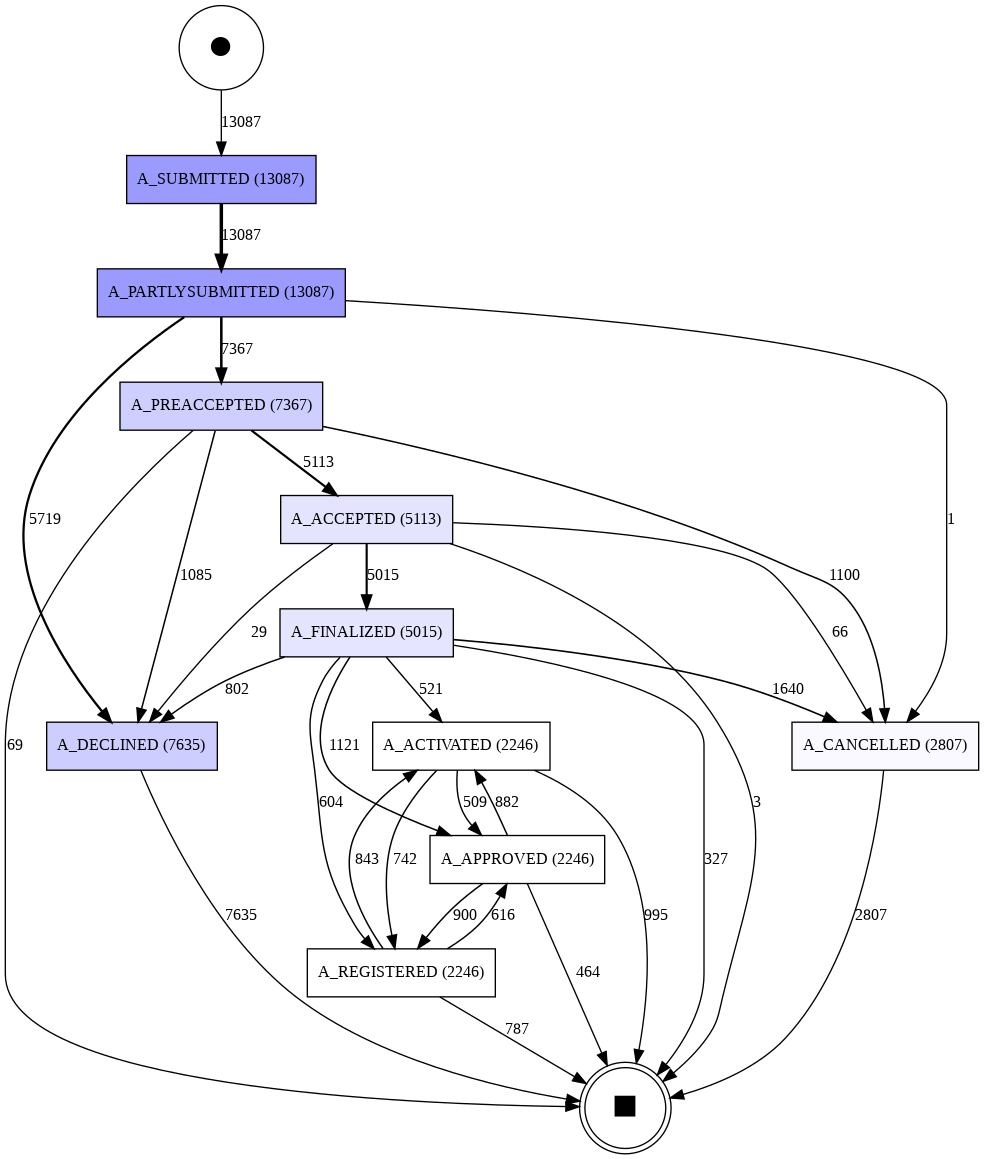

In [46]:

dfg, start_activities, end_activities = pm4py.discover_dfg(application_log)
pm4py.view_dfg(dfg, start_activities, end_activities)

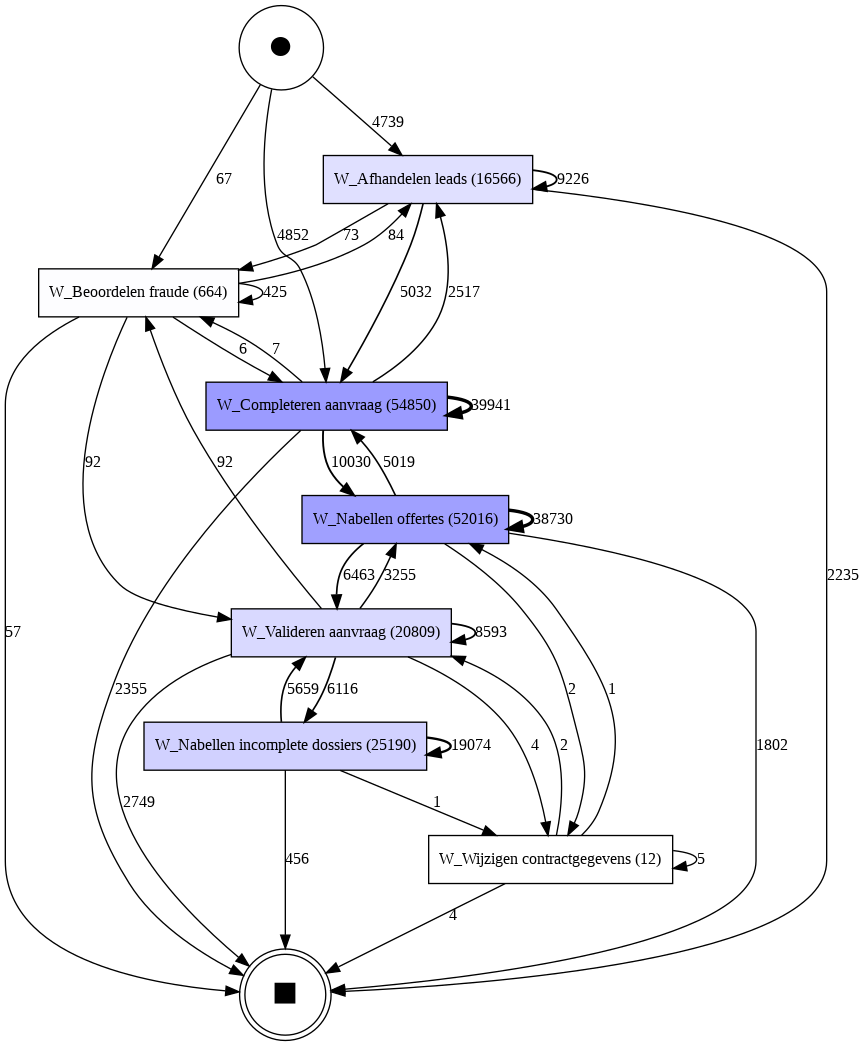

In [48]:

dfg, start_activities, end_activities = pm4py.discover_dfg(workItems_log)
pm4py.view_dfg(dfg, start_activities, end_activities)

In [55]:
from pm4py.algo.filtering.log.variants import variants_filter

from pm4py.statistics.traces.generic.log import case_statistics


In [56]:

workItems_log_variants = variants_filter.get_variants(workItems_log)
workItems_log_variants_count = case_statistics.get_variant_statistics(workItems_log)

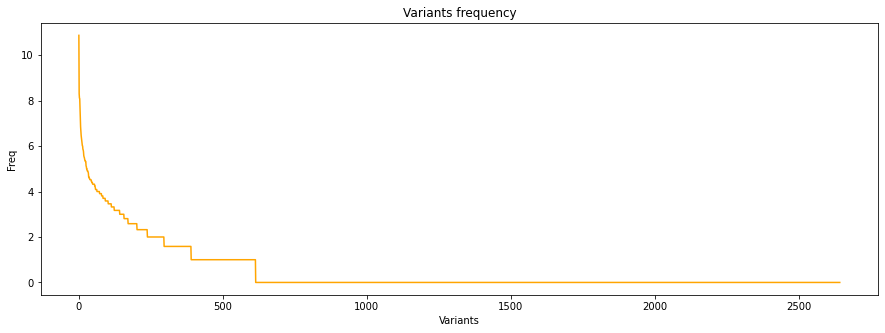

In [85]:
workItems_log_variants_count_df = pd.DataFrame.from_dict(workItems_log_variants_count)
variant = workItems_log_variants_count_df.index
frequency = workItems_log_variants_count_df['count']
freq_log = [math.log(i,2) for i in frequency ]
fig = plt.figure(figsize = (15,5))
plt.plot(variant,freq_log, color = 'orange')
plt.xlabel('Variants')
plt.ylabel('Freq')
plt.title('Variants frequency')
plt.show()

In [57]:

offers_log_variants = variants_filter.get_variants(offers_log)
offers_log_variants_count = case_statistics.get_variant_statistics(offers_log)

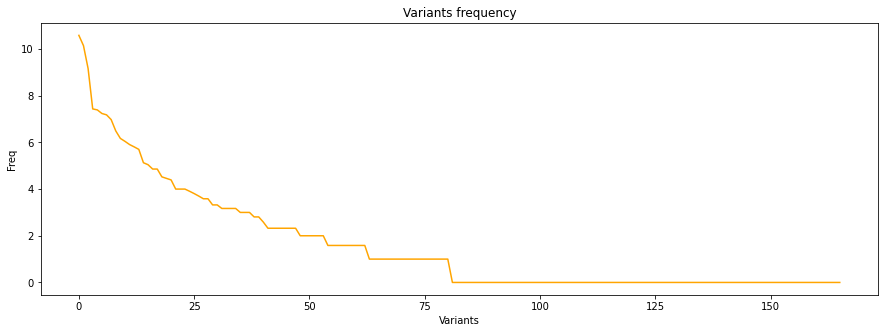

In [84]:
offers_log_variants_count_df = pd.DataFrame.from_dict(offers_log_variants_count)
variant = offers_log_variants_count_df.index
frequency = offers_log_variants_count_df['count']
freq_log = [math.log(i,2) for i in frequency ]
fig = plt.figure(figsize = (15,5))
plt.plot(variant,freq_log, color = 'orange')
plt.xlabel('Variants')
plt.ylabel('Freq')
plt.title('Variants frequency')
plt.show()

In [58]:

application_log_variants = variants_filter.get_variants(application_log)
application_log_variants_count = case_statistics.get_variant_statistics(application_log)

In [86]:
len(application_log_variants_count)

17

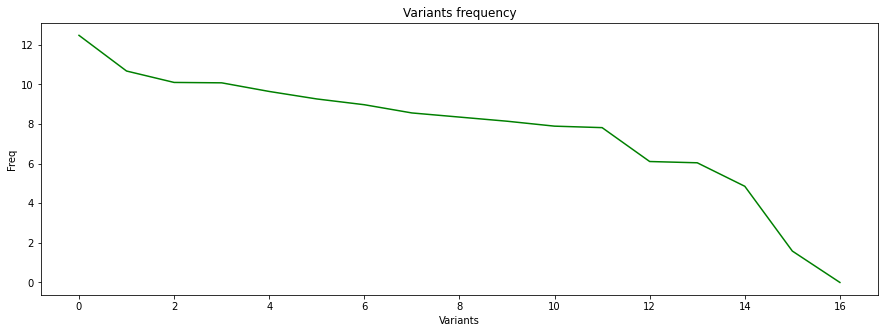

In [88]:
application_log_variants_count_df = pd.DataFrame.from_dict(application_log_variants_count)
variant = application_log_variants_count_df.index
frequency = application_log_variants_count_df['count']
freq_log = [math.log(i,2) for i in frequency ]
fig = plt.figure(figsize = (15,5))
plt.plot(variant,freq_log, color = 'green')
plt.xlabel('Variants')
plt.ylabel('Freq')
plt.title('Variants frequency')
plt.show()

In [77]:
def analyze_process(data, event_log):
  profile = data.groupby('case:concept:name').agg(
    Activity =  ('concept:name', 'count'),
    Activity_list =  ('concept:name', lambda x: ','.join(x)),
    Resource  = ('org:resource', 'nunique'),
    Duration = ('time:timestamp', lambda x: x.max() - x.min())
  )

  start_timestamp = data['time:timestamp'].min()
  print(f"Start Timestamp: {start_timestamp}")

  end_timestamp = data['time:timestamp'].max()
  print(f"End Timestamp: {end_timestamp}")

  num_activity_types = data['concept:name'].nunique()
  print(f"Number of Activity Types: {num_activity_types}")

  num_resources = data['org:resource'].nunique()
  print(f"Number of Resources: {num_resources}")

  num_cases = len(event_log)
  print(f"Number of Cases: {num_cases}")

  num_events = len(data)
  print(f"Number of Events: {num_events}")

  mean_duration = profile['Duration'].mean()
  print(f"Mean Duration (excluding 0 day filtered): {mean_duration}")

  filtered_duration = profile[(profile['Duration'] > np.timedelta64(25, 'h'))]['Duration']
  mean_filtered_duration = filtered_duration.mean()
  print(f"Mean Duration (0 day filtered): {mean_filtered_duration}")

In [78]:
analyze_process(application_log_df,application_log)

Start Timestamp: 2011-09-30 22:38:44.546000+00:00
End Timestamp: 2012-03-14 14:33:57.651000+00:00
Number of Activity Types: 10
Number of Resources: 61
Number of Cases: 13087
Number of Events: 60849
Mean Duration (excluding 0 day filtered): 8 days 01:55:14.860649805
Mean Duration (0 day filtered): 17 days 13:08:00.343700820


In [97]:
application_log_f = pm4py.filter_case_performance(application_log, 86400, 999999999999)

In [98]:
print(len(application_log),len(application_log_f))

13087 6012


In [100]:
# Essenatials imports for process discovery
from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.objects.conversion.process_tree import converter as pt_converter
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.objects.petri_net.importer import importer as pnml_importer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
from pm4py.visualization.dfg import visualizer as dfg_visualization


<ipython-input-119-4060a95e4cb3>:2: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=application_log_f)


replaying log with TBR, completed variants ::   0%|          | 0/14 [00:00<?, ?it/s]

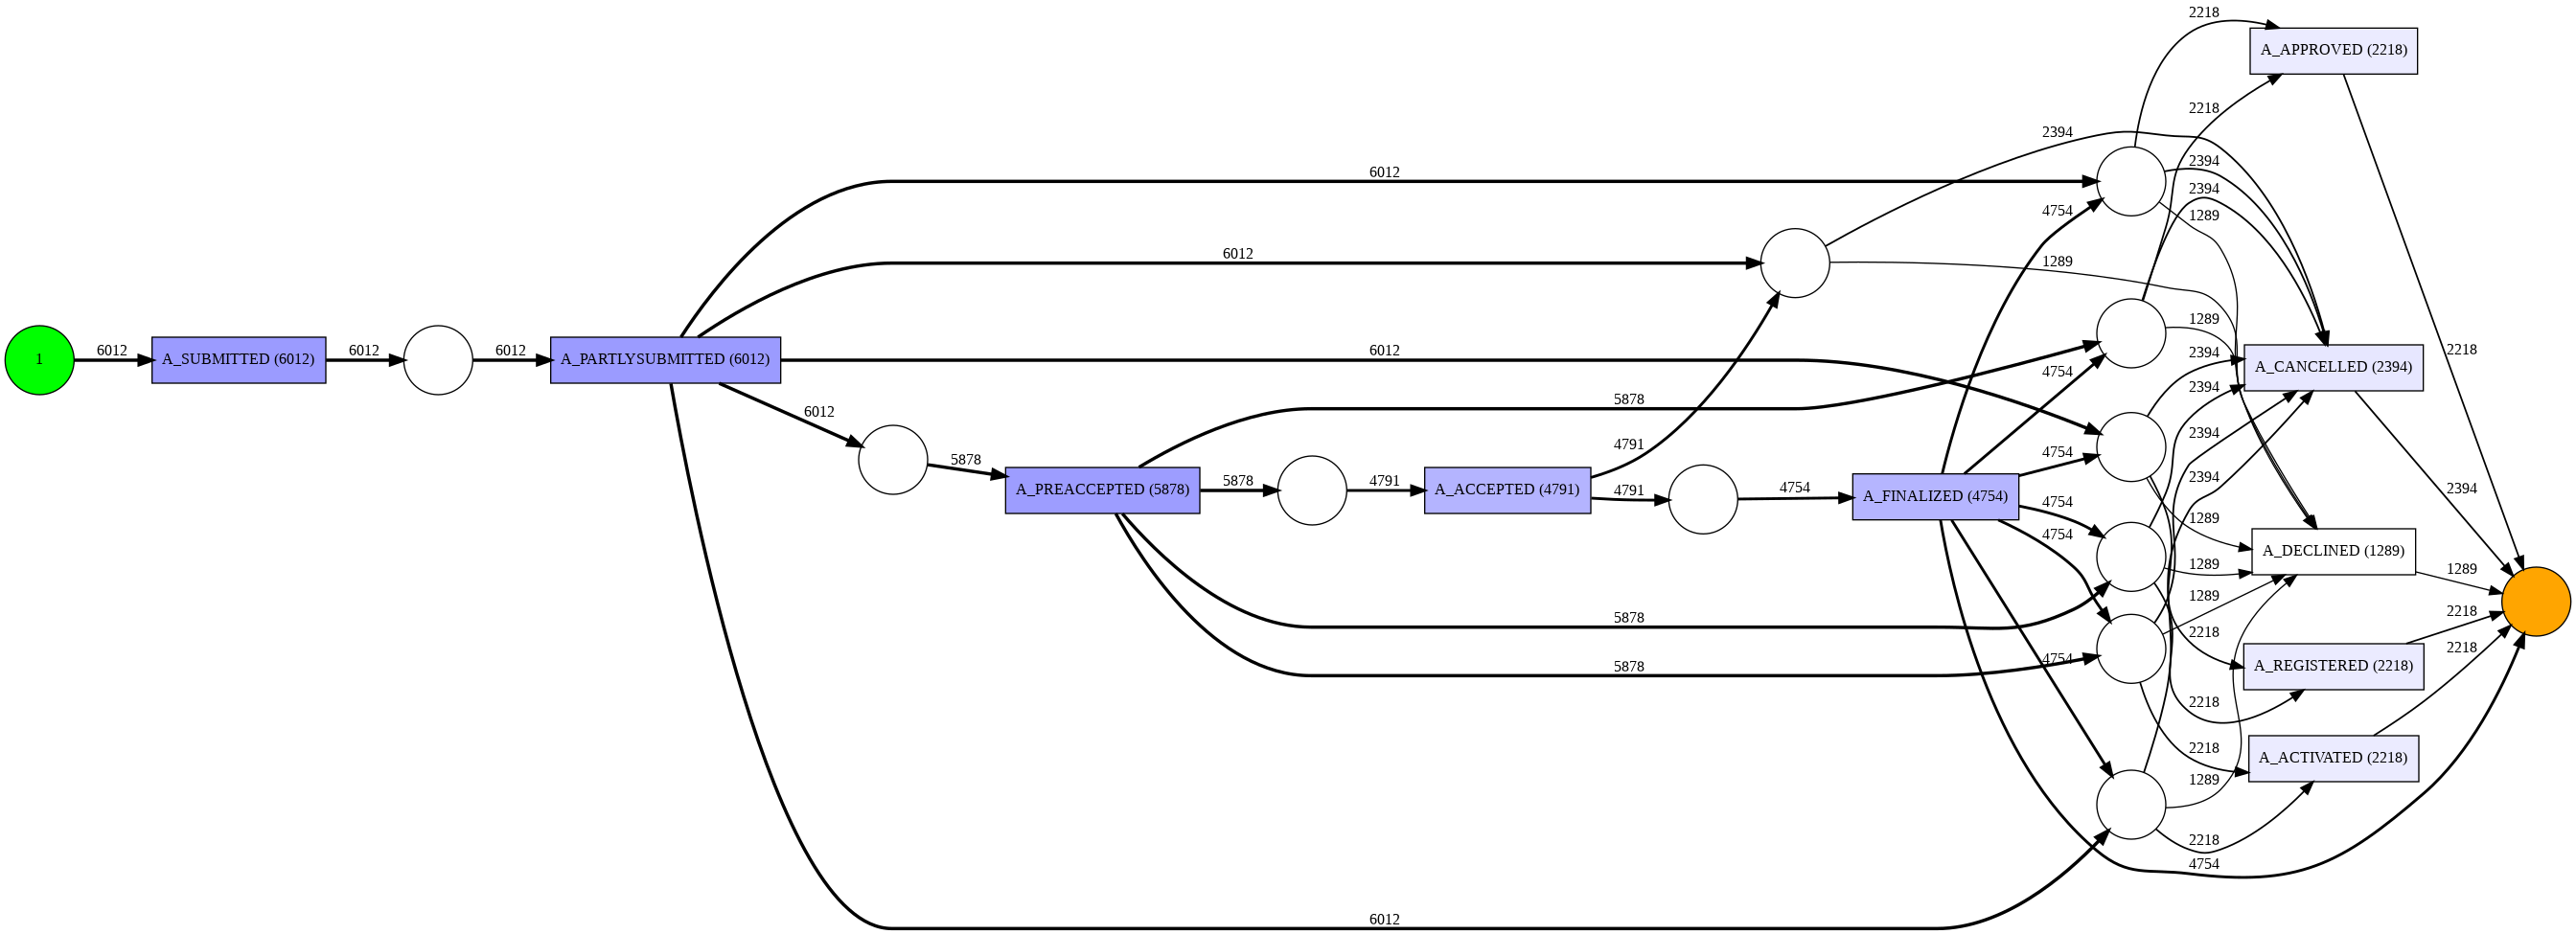

In [119]:
net, initial_marking, final_marking = alpha_miner.apply(application_log_f)
gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=application_log_f)
pn_visualizer.view(gviz)

In [102]:
# Fitness

application_alpha_fitness = replay_fitness_evaluator.apply(application_log_f, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
# Precision

application_alpha_precision = precision_evaluator.apply(application_log_f, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
# Generalization

application_alpha_generalization = generalization_evaluator.apply(application_log_f, net, initial_marking, final_marking)
# Simplicity

application_alpha_simplicity = simplicity_evaluator.apply(net)

print("Fitness:",application_alpha_fitness)
print("Precision :",application_alpha_precision)
print("Generalization :",application_alpha_generalization)
print("Simplicity :",application_alpha_simplicity)

replaying log with TBR, completed variants ::   0%|          | 0/14 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/14 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/14 [00:00<?, ?it/s]

Fitness: {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.8157758499564103, 'log_fitness': 0.8008920942481521, 'percentage_of_fitting_traces': 0.0}
Precision : 0.627031268390286
Generalization : 0.9820220701134018
Simplicity : 0.30666666666666664


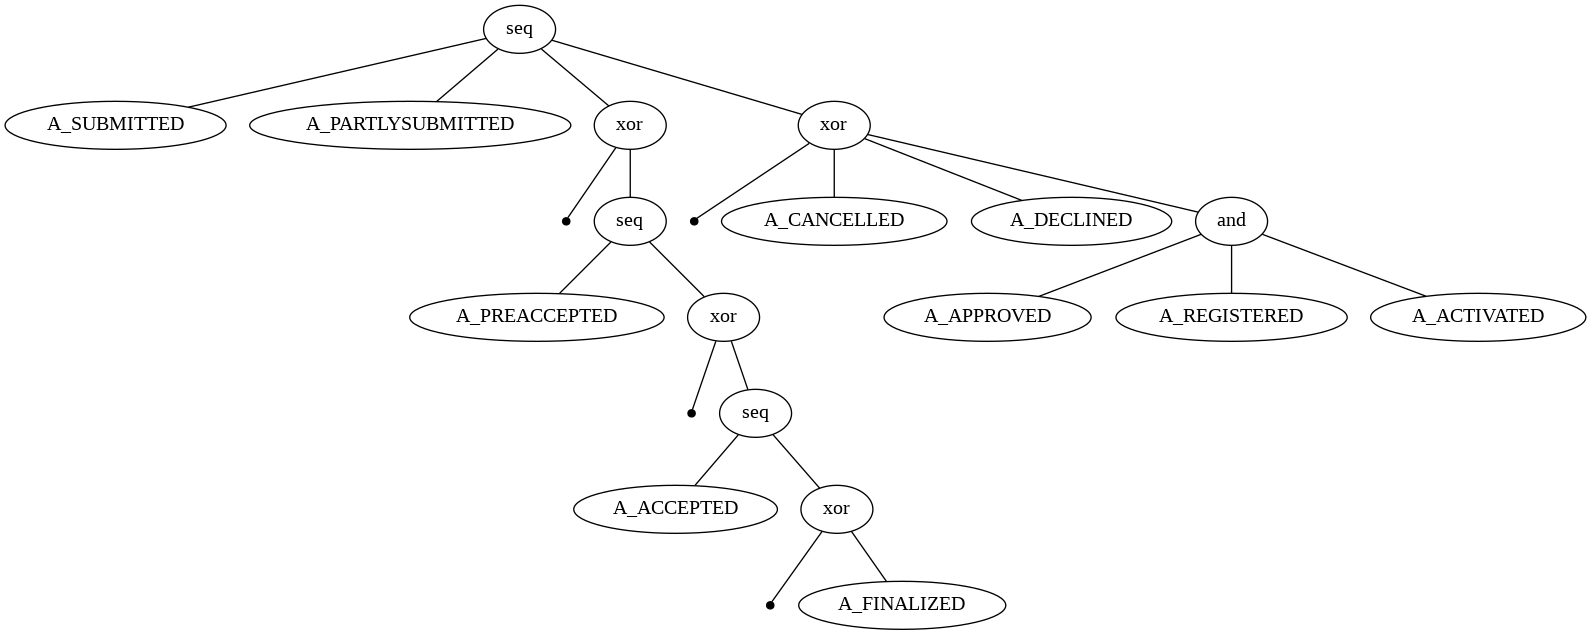

In [121]:
tree = inductive_miner.apply_tree(application_log_f)
gviz = pt_visualizer.apply(tree, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
pt_visualizer.view(gviz)

<ipython-input-140-cdba4d4386f2>:2: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net, initial_marking, final_marking,


replaying log with TBR, completed variants ::   0%|          | 0/14 [00:00<?, ?it/s]

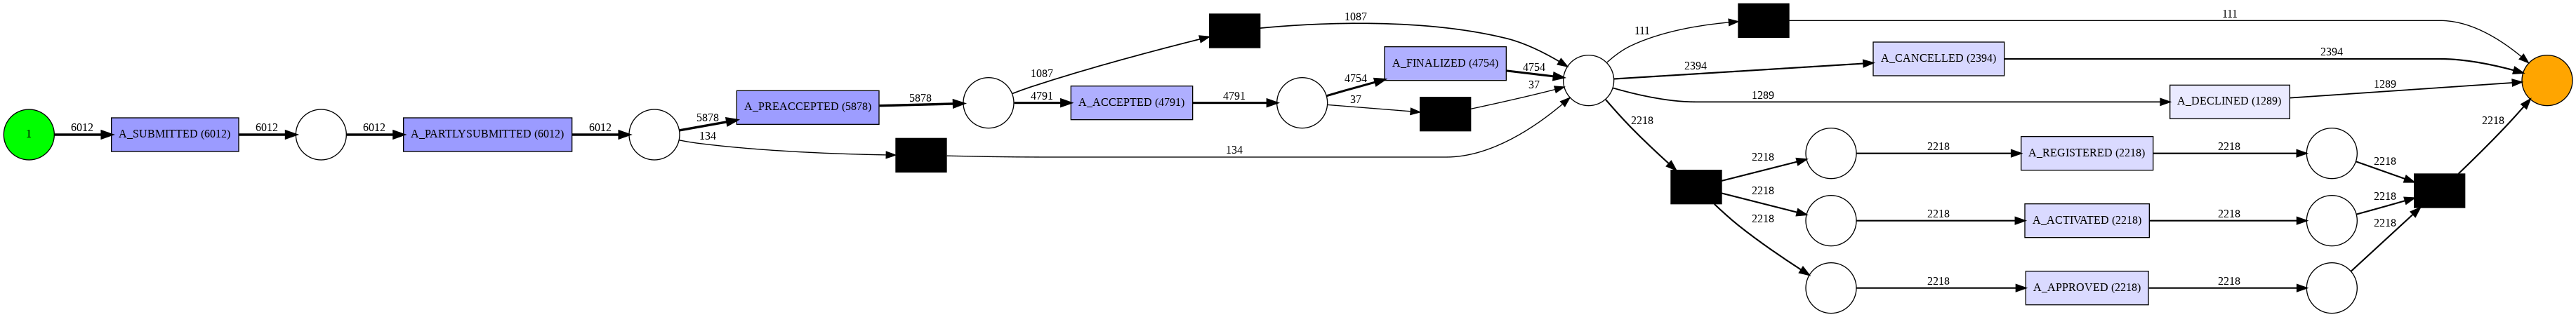

In [140]:
net, initial_marking, final_marking = pt_converter.apply(tree)
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=application_log_f,parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
pn_visualizer.view(gviz)

In [138]:

application_inductive_fitness = replay_fitness_evaluator.apply(application_log_f, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
application_inductive_precision = precision_evaluator.apply(application_log_f, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
application_inductive_generalization = generalization_evaluator.apply(application_log_f, net, initial_marking, final_marking)
application_inductive_simplicity = simplicity_evaluator.apply(net)


print("Fitness",application_inductive_fitness)
print("Precision",application_inductive_precision)
print("Generalization",application_inductive_generalization)
print("Simplicity",application_inductive_simplicity)

replaying log with TBR, completed variants ::   0%|          | 0/14 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/14 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/14 [00:00<?, ?it/s]

Fitness {'perc_fit_traces': 54.357950765136394, 'average_trace_fitness': 0.9508483033932348, 'log_fitness': 0.9484777298351927, 'percentage_of_fitting_traces': 54.357950765136394}
Precision 1.0
Generalization 0.9129287815817367
Simplicity 0.6666666666666666


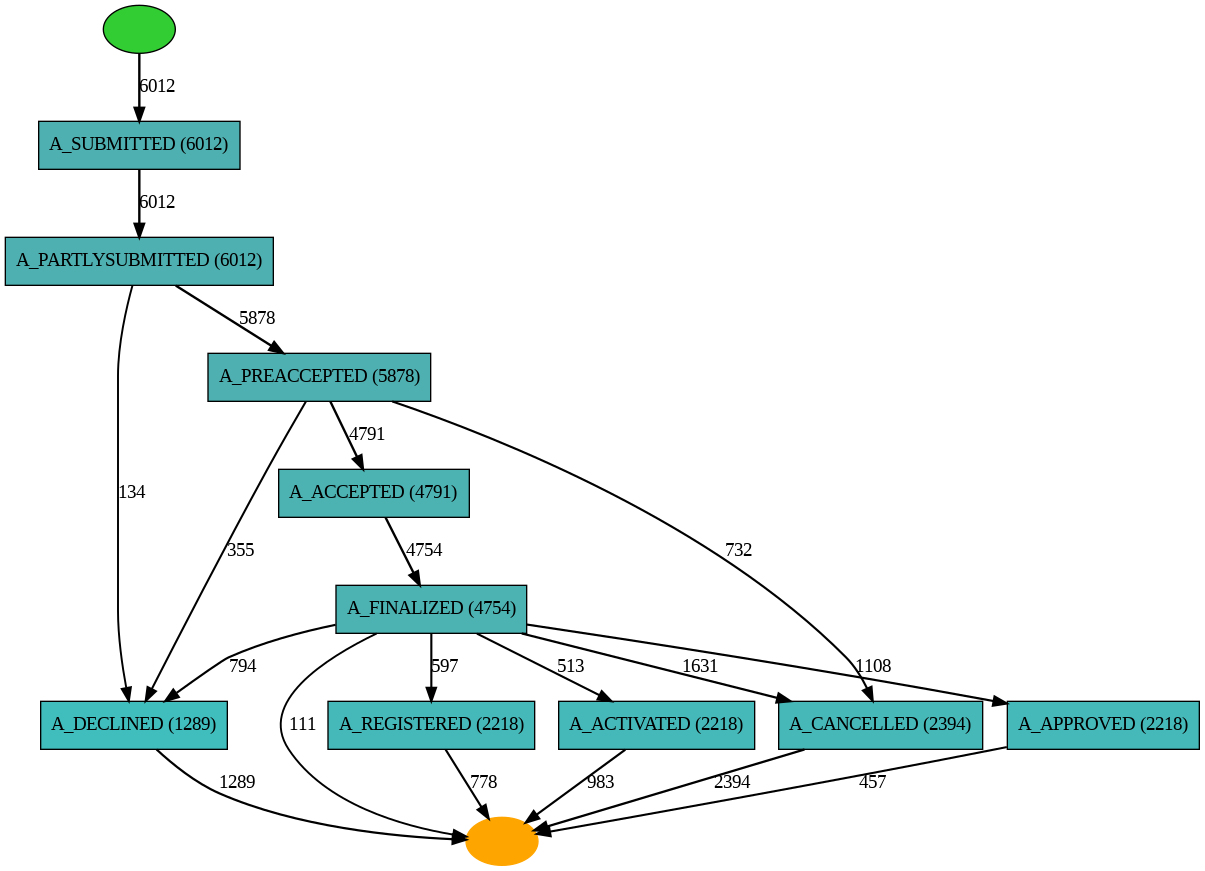

In [124]:

net = heuristics_miner.apply_heu(application_log_f, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})

gviz = hn_visualizer.apply(net)
hn_visualizer.view(gviz)

<ipython-input-135-c4fcbaa7e84d>:3: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=application_log_f)


replaying log with TBR, completed variants ::   0%|          | 0/14 [00:00<?, ?it/s]

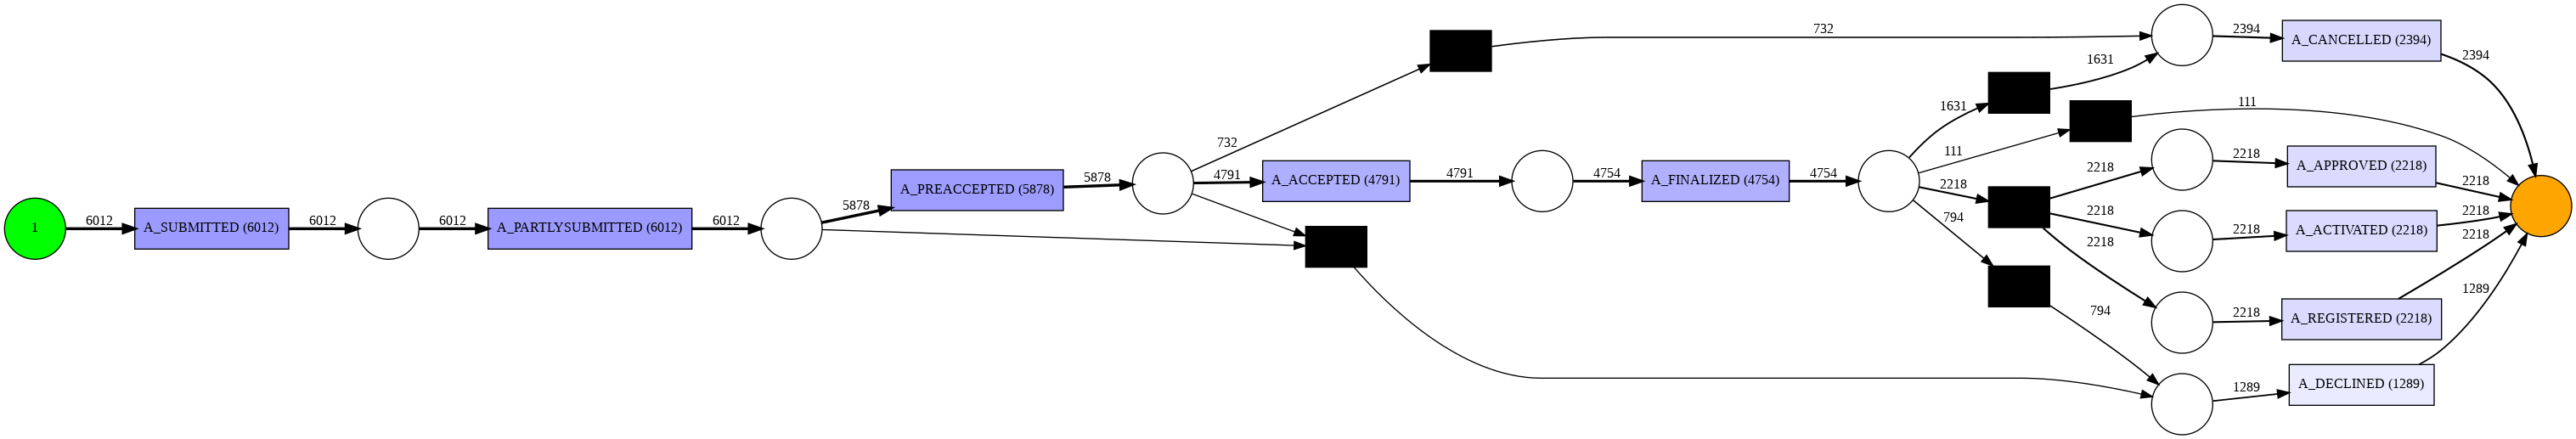

In [135]:
net, initial_marking, final_marking = heuristics_miner.apply(application_log_f, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})

gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=application_log_f)
pn_visualizer.view(gviz)

In [136]:
application_heuristic_fitness = replay_fitness_evaluator.apply(application_log_f, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
application_heuristic_precision = precision_evaluator.apply(application_log_f, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
application_heuristic_generalization = generalization_evaluator.apply(application_log_f, net, initial_marking, final_marking)
application_heuristic_simplicity = simplicity_evaluator.apply(net)

print("Fitness:",application_heuristic_fitness)
print("Precision:",application_heuristic_precision)
print("Generalization:",application_heuristic_generalization)
print("Simplicity:",application_heuristic_simplicity)

replaying log with TBR, completed variants ::   0%|          | 0/14 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/14 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/14 [00:00<?, ?it/s]

Fitness: {'perc_fit_traces': 54.357950765136394, 'average_trace_fitness': 0.9508483033932348, 'log_fitness': 0.9484777298351927, 'percentage_of_fitting_traces': 54.357950765136394}
Precision: 1.0
Generalization: 0.9129287815817367
Simplicity: 0.6666666666666666


In [141]:

from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments


replayed_traces = token_replay.apply(application_log, net, initial_marking, final_marking)


print("REPLAY")
print("Number of traces", len(replayed_traces))

anomalous_traces = []
i = 0
while i < len(replayed_traces):
	if replayed_traces[i]["trace_fitness"] < 1:
		anomalous_traces.append(application_log[i].attributes["concept:name"])
	i += 1

print(', '.join(map(str, anomalous_traces)))
print("Number of anomalous traces ", len(anomalous_traces))

print("Percentage of anomalous traces", (len(anomalous_traces)/len(replayed_traces))*100 , '%')


aligned_traces = alignments.apply_log(application_log, net, initial_marking, final_marking)
print("ALIGNMENTS")
print("Number of traces", len(aligned_traces))


anomalous_traces = []
i = 0
while i < len(aligned_traces):
	if aligned_traces[i]["fitness"] != 1:
		anomalous_traces.append(application_log[i].attributes["concept:name"])
		#anomalous_traces.append(aligned_traces[i]['alignment'])
	i += 1

print(anomalous_traces)
print("Number of anomalous traces ", len(anomalous_traces))

print("Percentage of anomalous traces", (len(anomalous_traces)/len(aligned_traces))*100 , '%')

replaying log with TBR, completed variants ::   0%|          | 0/17 [00:00<?, ?it/s]

REPLAY
Number of traces 13087

Number of anomalous traces  0
Percentage of anomalous traces 0.0 %


aligning log, completed variants ::   0%|          | 0/17 [00:00<?, ?it/s]

ALIGNMENTS
Number of traces 13087
[]
Number of anomalous traces  0
Percentage of anomalous traces 0.0 %


In [79]:
analyze_process(offers_log_df,offers_log)

Start Timestamp: 2011-10-01 08:44:40.725000+00:00
End Timestamp: 2012-03-14 14:50:59.683000+00:00
Number of Activity Types: 7
Number of Resources: 60
Number of Cases: 5015
Number of Events: 31244
Mean Duration (excluding 0 day filtered): 17 days 04:20:24.846146959
Mean Duration (0 day filtered): 18 days 00:27:56.279726417


In [142]:
len(offers_log_variants_count)

166

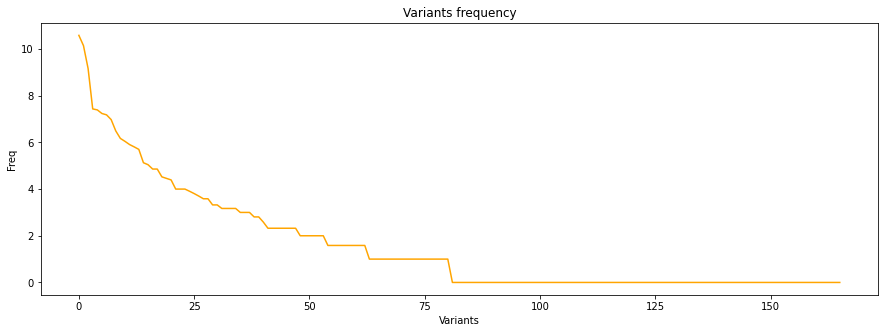

In [145]:
offers_log_variants_count_df = pd.DataFrame.from_dict(offers_log_variants_count)
variant = offers_log_variants_count_df.index
frequency = offers_log_variants_count_df['count']
freq_log = [math.log(i,2) for i in frequency ]
fig = plt.figure(figsize = (15,5))
plt.plot(variant,freq_log, color = 'orange')
plt.xlabel('Variants')
plt.ylabel('Freq')
plt.title('Variants frequency')
plt.show()

In [146]:
len(offers_log)

5015

In [147]:
k = 8
offers_log_f = pm4py.filter_variants_top_k(offers_log, k)

In [148]:
len(offers_log_f)

4006

In [149]:
offers_log_f = pm4py.filter_case_performance(offers_log_f, 86400, 999999999999)

In [150]:
len(offers_log_f)

3816

<ipython-input-162-c4f90774ec20>:2: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=offers_log_f)


replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

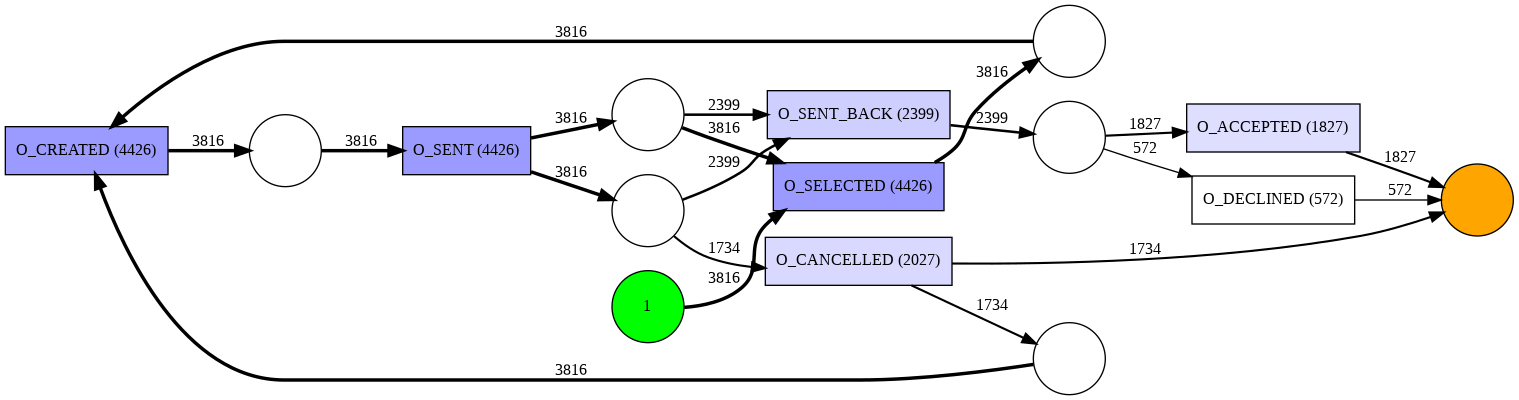

In [162]:
net, initial_marking, final_marking = alpha_miner.apply(offers_log_f)
gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=offers_log_f)
pn_visualizer.view(gviz)

In [153]:
# Fitness

offer_alpha_fitness = replay_fitness_evaluator.apply(offers_log_f, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
# Precision

offer_alpha_precision = precision_evaluator.apply(offers_log_f, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
# Generalization

offer_alpha_generalization = generalization_evaluator.apply(offers_log_f, net, initial_marking, final_marking)
# Simplicity

offer_alpha_simplicity = simplicity_evaluator.apply(net)

print("Fitness:",offer_alpha_fitness)
print("Precision :",offer_alpha_precision)
print("Generalization :",offer_alpha_generalization)
print("Simplicity :",offer_alpha_simplicity)

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/14 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

Fitness: {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.8260000307170607, 'log_fitness': 0.8261293146670229, 'percentage_of_fitting_traces': 0.0}
Precision : 1.0
Generalization : 0.9781529849242838
Simplicity : 0.6521739130434783


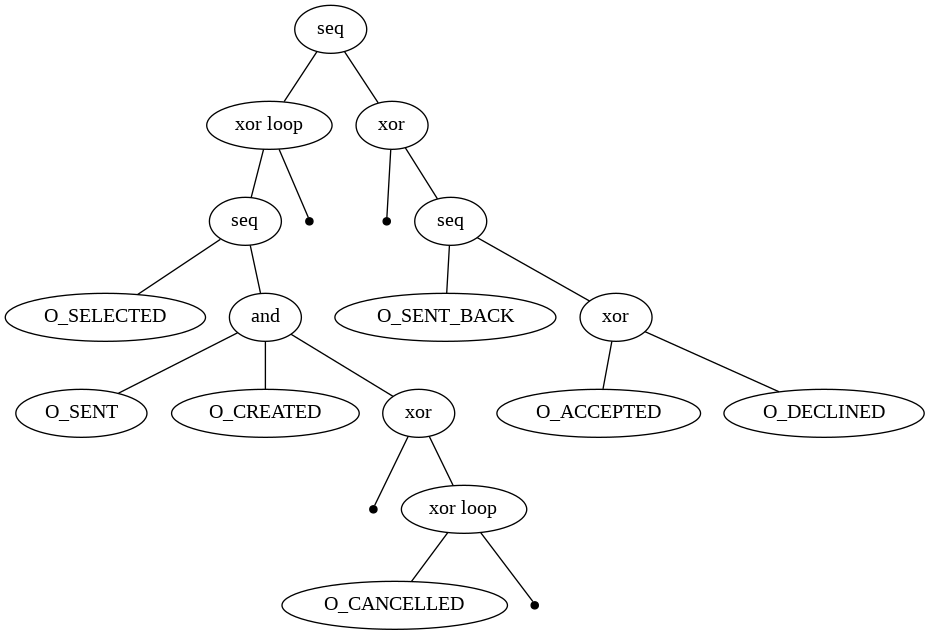

In [154]:
tree = inductive_miner.apply_tree(offers_log_f)
gviz = pt_visualizer.apply(tree, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
pt_visualizer.view(gviz)

<ipython-input-164-9f8aeb324b1b>:2: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net, initial_marking, final_marking,


replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

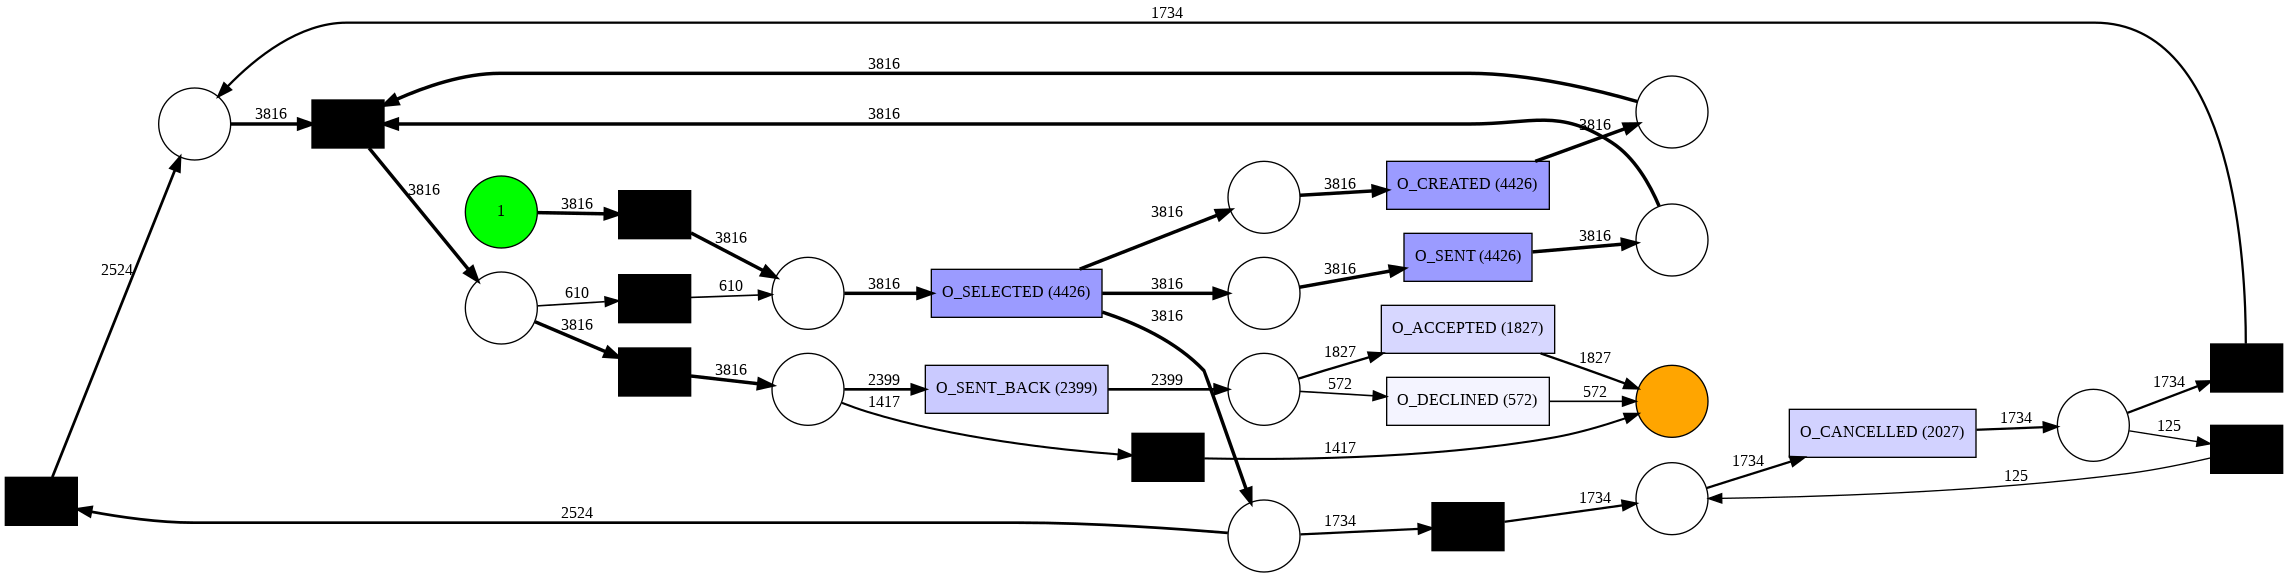

In [164]:
net, initial_marking, final_marking = pt_converter.apply(tree)
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=offers_log_f)
pn_visualizer.view(gviz)

In [156]:

offer_inductive_fitness = replay_fitness_evaluator.apply(offers_log_f, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
offer_inductive_precision = precision_evaluator.apply(offers_log_f, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
offer_inductive_generalization = generalization_evaluator.apply(offers_log_f, net, initial_marking, final_marking)
offer_inductive_simplicity = simplicity_evaluator.apply(net)


print("Fitness",offer_inductive_fitness)
print("Precision",offer_inductive_precision)
print("Generalization",offer_inductive_generalization)
print("Simplicity",offer_inductive_simplicity)

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/14 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

Fitness {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}
Precision 0.6635915554392393
Generalization 0.9735876823314985
Simplicity 0.7142857142857143


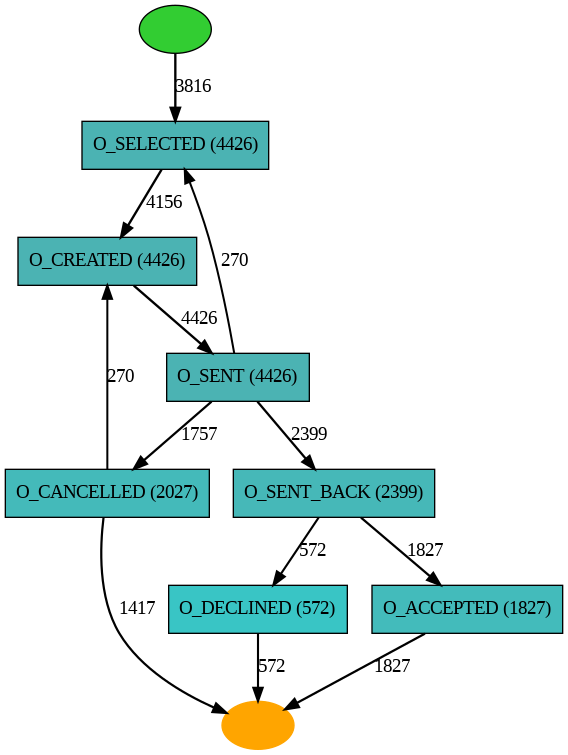

In [169]:

net = heuristics_miner.apply_heu(offers_log_f, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})

gviz = hn_visualizer.apply(net)
hn_visualizer.view(gviz)

<ipython-input-171-891334bfc1f0>:3: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=offers_log_f)


replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

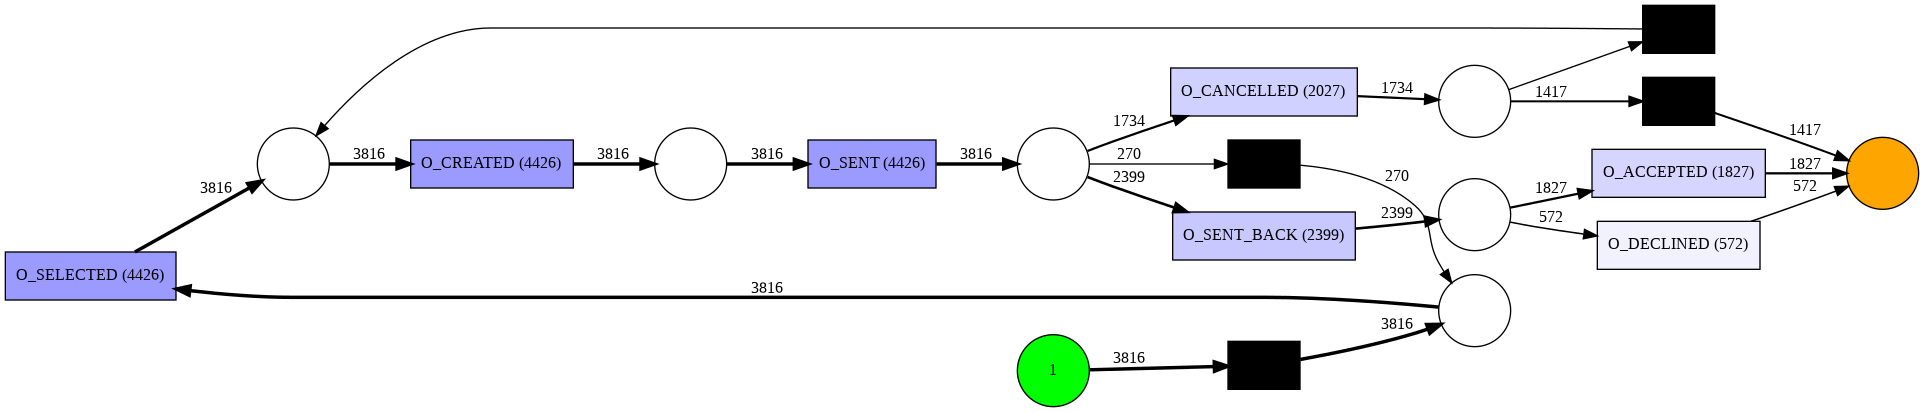

In [171]:
net, initial_marking, final_marking = heuristics_miner.apply(offers_log_f, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})

gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=offers_log_f)
pn_visualizer.view(gviz)

In [159]:
offer_heuristic_fitness = replay_fitness_evaluator.apply(offers_log_f, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
offer_heuristic_precision = precision_evaluator.apply(offers_log_f, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
offer_heuristic_generalization = generalization_evaluator.apply(offers_log_f, net, initial_marking, final_marking)
offer_heuristic_simplicity = simplicity_evaluator.apply(net)

print("Fitness:",offer_heuristic_fitness)
print("Precision:",offer_heuristic_precision)
print("Generalization:",offer_heuristic_generalization)
print("Simplicity:",offer_heuristic_simplicity)

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/14 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

Fitness: {'perc_fit_traces': 84.01467505241091, 'average_trace_fitness': 0.9860039069944755, 'log_fitness': 0.9792672150091768, 'percentage_of_fitting_traces': 84.01467505241091}
Precision: 0.9779544633176726
Generalization: 0.885769037581902
Simplicity: 0.7599999999999999


In [172]:

from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments


replayed_traces = token_replay.apply(offers_log, net, initial_marking, final_marking)


print("REPLAY")
print("Number of traces", len(replayed_traces))

anomalous_traces = []
i = 0
while i < len(replayed_traces):
	if replayed_traces[i]["trace_fitness"] < 1:
		anomalous_traces.append(offers_log[i].attributes["concept:name"])
	i += 1

print(', '.join(map(str, anomalous_traces)))
print("Number of anomalous traces ", len(anomalous_traces))

print("Percentage of anomalous traces", (len(anomalous_traces)/len(replayed_traces))*100 , '%')


aligned_traces = alignments.apply_log(offers_log, net, initial_marking, final_marking)
print("ALIGNMENTS")
print("Number of traces", len(aligned_traces))


anomalous_traces = []
i = 0
while i < len(aligned_traces):
	if aligned_traces[i]["fitness"] != 1:
		anomalous_traces.append(offers_log[i].attributes["concept:name"])
		#anomalous_traces.append(aligned_traces[i]['alignment'])
	i += 1

print(anomalous_traces)
print("Number of anomalous traces ", len(anomalous_traces))

print("Percentage of anomalous traces", (len(anomalous_traces)/len(aligned_traces))*100 , '%')

replaying log with TBR, completed variants ::   0%|          | 0/166 [00:00<?, ?it/s]

REPLAY
Number of traces 5015
173718, 173691, 173736, 173748, 173787, 173817, 173694, 173880, 174060, 174012, 173928, 174096, 174141, 174069, 174036, 174132, 174168, 174216, 174180, 174337, 174294, 174349, 173949, 174367, 174358, 174382, 174264, 174099, 174436, 174409, 174502, 174511, 174159, 174644, 174659, 174478, 174722, 174758, 174761, 174815, 174863, 174872, 174671, 174884, 174707, 174935, 174985, 174965, 175015, 175060, 174944, 175078, 175093, 175105, 174764, 174650, 175275, 175177, 175254, 175323, 175281, 175329, 175231, 175395, 175410, 175428, 175543, 175491, 175497, 175585, 175651, 175892, 175913, 175804, 175801, 175958, 175883, 175807, 175735, 175780, 175741, 175997, 176105, 176090, 176119, 176093, 176182, 176203, 175726, 176281, 176290, 176287, 176368, 176383, 176380, 176374, 176305, 176446, 176345, 176428, 176491, 176488, 176575, 176714, 176539, 176672, 176813, 176792, 176840, 176921, 176960, 176891, 176981, 176996, 177011, 176533, 176765, 177053, 177077, 177170, 177323, 177

aligning log, completed variants ::   0%|          | 0/166 [00:00<?, ?it/s]

ALIGNMENTS
Number of traces 5015
['173718', '173691', '173736', '173748', '173787', '173817', '173694', '173880', '174060', '174012', '173928', '174096', '174141', '174069', '174036', '174132', '174168', '174216', '174180', '174337', '174294', '174349', '173949', '174367', '174358', '174382', '174264', '174099', '174436', '174409', '174502', '174511', '174159', '174644', '174659', '174478', '174722', '174758', '174761', '174815', '174863', '174872', '174671', '174884', '174707', '174935', '174985', '174965', '175015', '175060', '174944', '175078', '175093', '175105', '174764', '174650', '175275', '175177', '175254', '175323', '175281', '175329', '175231', '175395', '175410', '175428', '175543', '175491', '175497', '175585', '175651', '175892', '175913', '175804', '175801', '175958', '175883', '175807', '175735', '175780', '175741', '175997', '176105', '176090', '176119', '176093', '176182', '176203', '175726', '176281', '176290', '176287', '176368', '176383', '176380', '176374', '17630

In [80]:
analyze_process(workItems_log_df,workItems_log)

Start Timestamp: 2011-09-30 22:39:38.875000+00:00
End Timestamp: 2012-03-14 15:04:54.681000+00:00
Number of Activity Types: 7
Number of Resources: 59
Number of Cases: 9658
Number of Events: 170107
Mean Duration (excluding 0 day filtered): 11 days 16:26:31.640076517
Mean Duration (0 day filtered): 17 days 20:54:58.011957562


In [176]:
len(workItems_log_variants_count)

2643

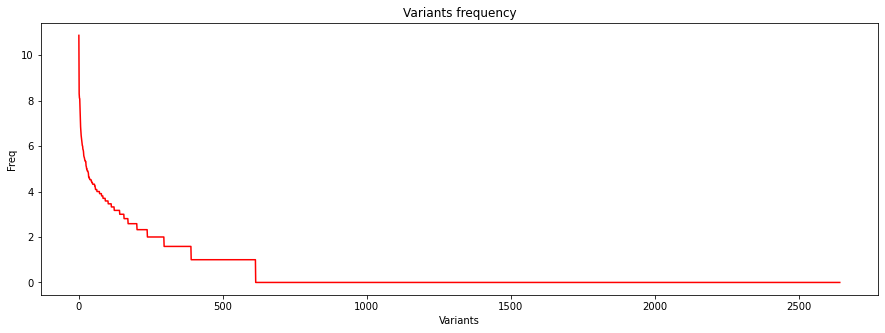

In [174]:
workItems_log_variants_count_df = pd.DataFrame.from_dict(workItems_log_variants_count)
variant = workItems_log_variants_count_df.index
frequency = workItems_log_variants_count_df['count']
freq_log = [math.log(i,2) for i in frequency ]
fig = plt.figure(figsize = (15,5))
plt.plot(variant,freq_log, color = 'red')
plt.xlabel('Variants')
plt.ylabel('Freq')
plt.title('Variants frequency')
plt.show()

In [216]:
len(workItems_log)

9658

In [214]:
workItems_log_f = pm4py.filter_case_performance(workItems_log, 86400, 999999999999)


In [215]:
len(workItems_log_f)

6299

<ipython-input-217-2c53a394db2d>:2: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=workItems_log_f)


replaying log with TBR, completed variants ::   0%|          | 0/2627 [00:00<?, ?it/s]

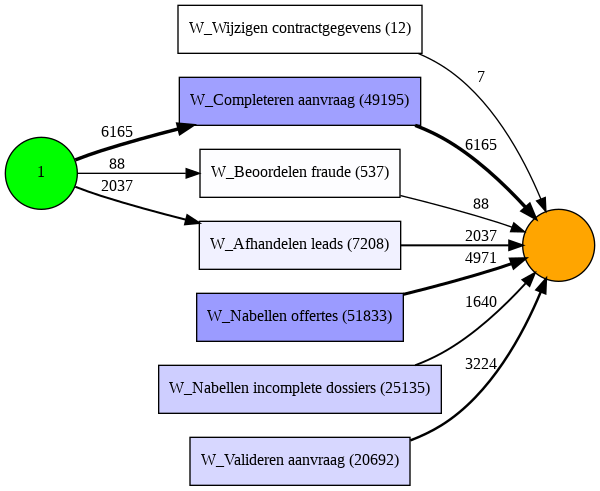

In [217]:
net, initial_marking, final_marking = alpha_miner.apply(workItems_log_f)
gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=workItems_log_f)
pn_visualizer.view(gviz)

In [219]:
workItems_alpha_fitness = replay_fitness_evaluator.apply(workItems_log_f, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
workItems_alpha_precision = precision_evaluator.apply(workItems_log_f, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
workItems_alpha_generalization = generalization_evaluator.apply(workItems_log_f, net, initial_marking, final_marking)

workItems_alpha_simplicity = simplicity_evaluator.apply(net)

print("Fitness:",workItems_alpha_fitness)
print("Precision :",workItems_alpha_precision)
print("Generalization :",workItems_alpha_generalization)
print("Simplicity :",workItems_alpha_simplicity)

replaying log with TBR, completed variants ::   0%|          | 0/2627 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/26412 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2627 [00:00<?, ?it/s]

Fitness: {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.20119390551893662, 'log_fitness': 0.13875211887456135, 'percentage_of_fitting_traces': 0.0}
Precision : 0.2727272727272727
Generalization : 0.947747544437469
Simplicity : 0.8181818181818181


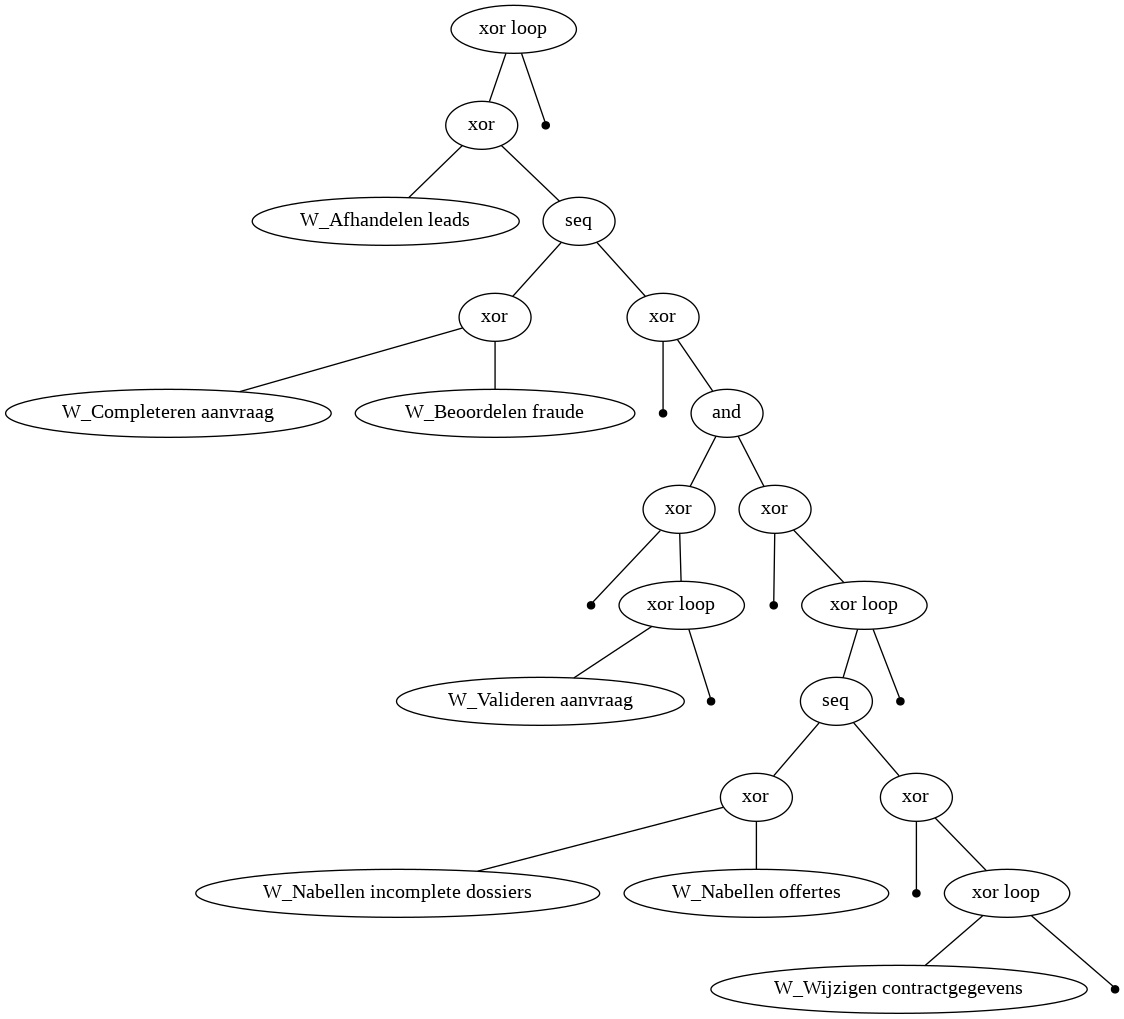

In [220]:
tree = inductive_miner.apply_tree(workItems_log_f)
gviz = pt_visualizer.apply(tree, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
pt_visualizer.view(gviz)

<ipython-input-221-e3332f3f795c>:2: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net, initial_marking, final_marking,


replaying log with TBR, completed variants ::   0%|          | 0/2627 [00:00<?, ?it/s]

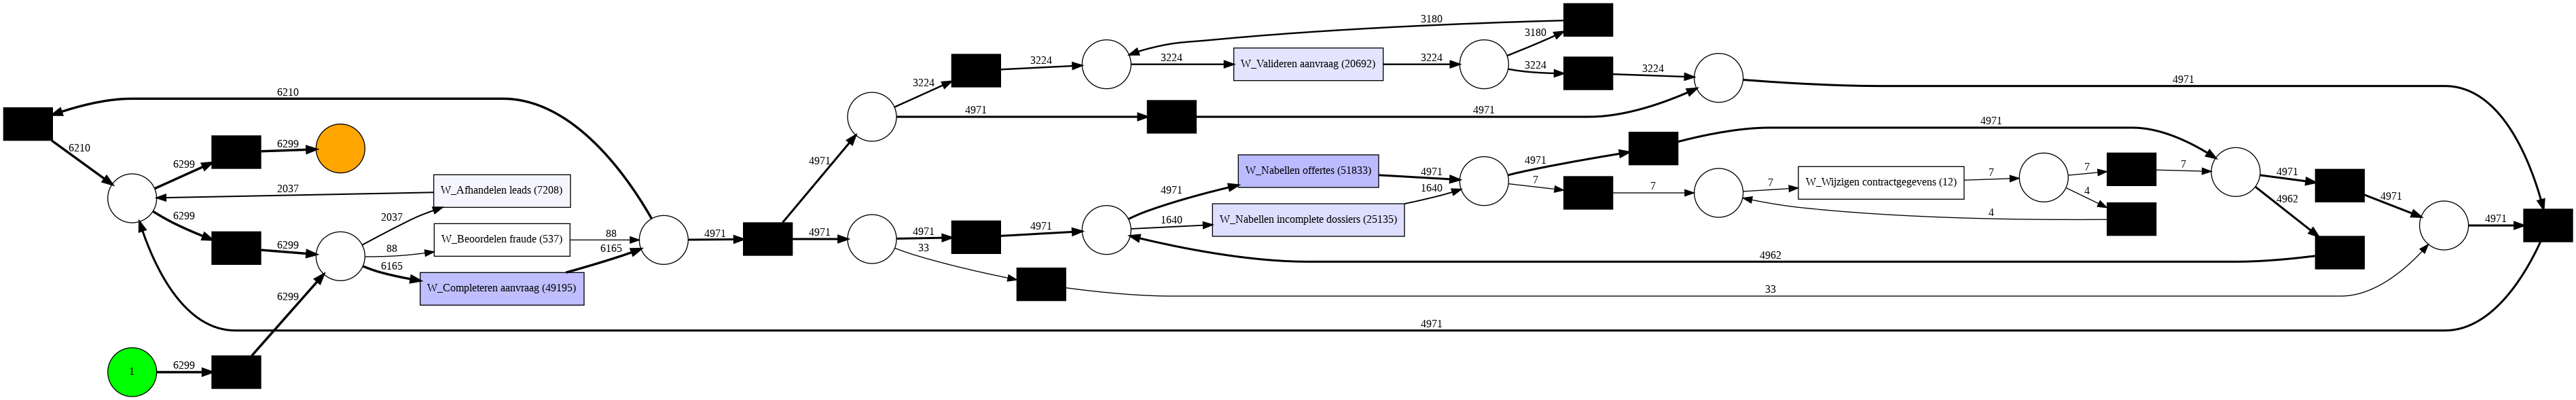

In [221]:
net, initial_marking, final_marking = pt_converter.apply(tree)
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=workItems_log_f)
pn_visualizer.view(gviz)

In [222]:

workItems_inductive_fitness = replay_fitness_evaluator.apply(workItems_log_f, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
workItems_inductive_precision = precision_evaluator.apply(workItems_log_f, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
workItems_inductive_generalization = generalization_evaluator.apply(workItems_log_f, net, initial_marking, final_marking)
workItems_inductive_simplicity = simplicity_evaluator.apply(net)


print("Fitness",workItems_inductive_fitness)
print("Precision",workItems_inductive_precision)
print("Generalization",workItems_inductive_generalization)
print("Simplicity",workItems_inductive_simplicity)

replaying log with TBR, completed variants ::   0%|          | 0/2627 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/26412 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2627 [00:00<?, ?it/s]

Fitness {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}
Precision 0.280576602159042
Generalization 0.9270304194327494
Simplicity 0.6507936507936508


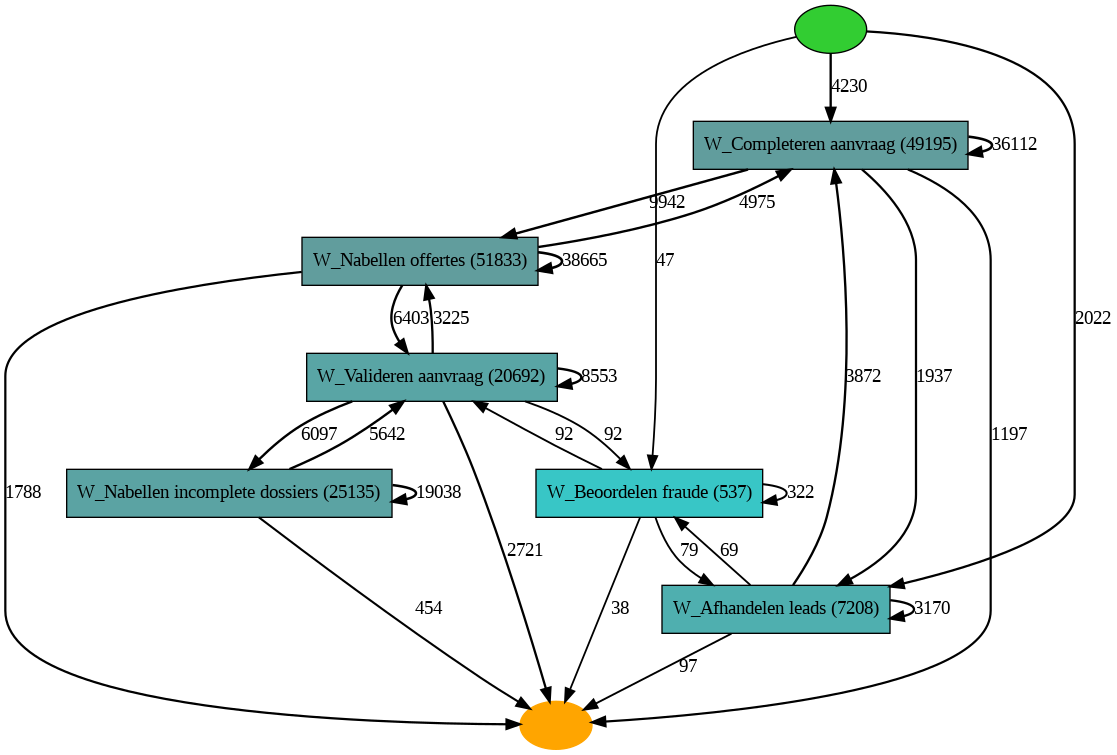

In [224]:

net = heuristics_miner.apply_heu(workItems_log_f, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})

gviz = hn_visualizer.apply(net)
hn_visualizer.view(gviz)

<ipython-input-225-c97c3fba41a4>:3: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=workItems_log_f)


replaying log with TBR, completed variants ::   0%|          | 0/2627 [00:00<?, ?it/s]

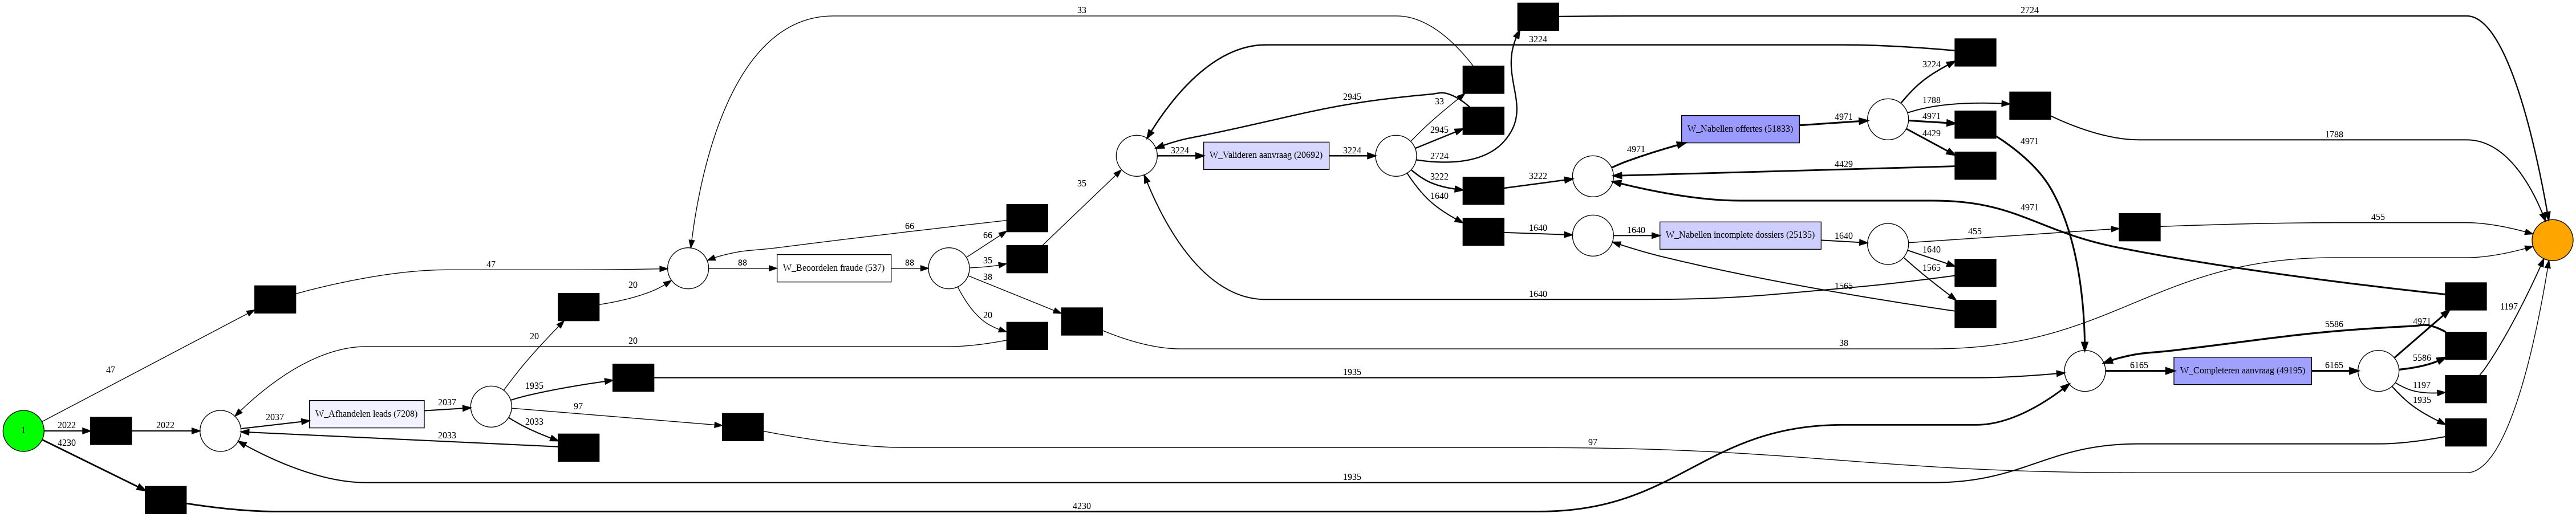

In [225]:
net, initial_marking, final_marking = heuristics_miner.apply(workItems_log_f, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})

gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=workItems_log_f)
pn_visualizer.view(gviz)

In [226]:
workItems_heuristic_fitness = replay_fitness_evaluator.apply(workItems_log_f, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
workItems_heuristic_precision = precision_evaluator.apply(workItems_log_f, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
workItems_heuristic_generalization = generalization_evaluator.apply(workItems_log_f, net, initial_marking, final_marking)
workItems_heuristic_simplicity = simplicity_evaluator.apply(net)

print("Fitness:",workItems_heuristic_fitness)
print("Precision:",workItems_heuristic_precision)
print("Generalization:",workItems_heuristic_generalization)
print("Simplicity:",workItems_heuristic_simplicity)

replaying log with TBR, completed variants ::   0%|          | 0/2627 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/26412 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2627 [00:00<?, ?it/s]

Fitness: {'perc_fit_traces': 99.952373392602, 'average_trace_fitness': 0.9999952326370053, 'log_fitness': 0.9999906772945509, 'percentage_of_fitting_traces': 99.952373392602}
Precision: 0.5211472625228744
Generalization: 0.9604848713785826
Simplicity: 0.5529411764705883


In [228]:

from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments


replayed_traces = token_replay.apply(workItems_log, net, initial_marking, final_marking)


print("REPLAY")
print("Number of traces", len(replayed_traces))

anomalous_traces = []
i = 0
while i < len(replayed_traces):
	if replayed_traces[i]["trace_fitness"] < 1:
		anomalous_traces.append(workItems_log[i].attributes["concept:name"])
	i += 1

print(', '.join(map(str, anomalous_traces)))
print("Number of anomalous traces ", len(anomalous_traces))

print("Percentage of anomalous traces", (len(anomalous_traces)/len(replayed_traces))*100 , '%')


aligned_traces = alignments.apply_log(workItems_log, net, initial_marking, final_marking)
print("ALIGNMENTS")
print("Number of traces", len(aligned_traces))


anomalous_traces = []
i = 0
while i < len(aligned_traces):
	if aligned_traces[i]["fitness"] != 1:
		anomalous_traces.append(workItems_log[i].attributes["concept:name"])
		#anomalous_traces.append(aligned_traces[i]['alignment'])
	i += 1

print(anomalous_traces)
print("Number of anomalous traces ", len(anomalous_traces))

print("Percentage of anomalous traces", (len(anomalous_traces)/len(aligned_traces))*100 , '%')

replaying log with TBR, completed variants ::   0%|          | 0/2643 [00:00<?, ?it/s]

REPLAY
Number of traces 9658
173754, 177206, 195082
Number of anomalous traces  3
Percentage of anomalous traces 0.031062331745703043 %


aligning log, completed variants ::   0%|          | 0/2643 [00:00<?, ?it/s]

ALIGNMENTS
Number of traces 9658
['173694', '173754', '175756', '177206', '178843', '181447', '191464', '191737', '195082', '204523']
Number of anomalous traces  10
Percentage of anomalous traces 0.10354110581901013 %
